Test if L1 normalizing Largrange Multipliers improve SVM by reducing number of support vector
 
delicate dataset

regularization

In [1]:
import sys
sys.path.append('./custom_qiskit')

import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from scipy.stats import bernoulli

from classification.classifier import SVM
from classification.optimizer import QpDuel
from datageneration import data_generation


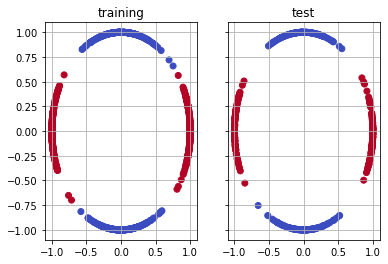

In [2]:
dim = 2
num_train = 2**10
num_test = 2**9
C = None
dist = 1
cent = .05

X1, y1 = data_generation(dim, int(np.ceil(num_train/4)), 1, mean=np.array([dist, 0]), cov=cent*np.eye(dim))
X2, y2 = data_generation(dim, int(np.ceil(num_train/4)), 1, mean=np.array([-dist, 0]), cov=cent*np.eye(dim))
X3, y3 = data_generation(dim, int(np.ceil(num_train/4)), -1, mean=np.array([0, dist]), cov=cent*np.eye(dim))
X4, y4 = data_generation(dim, int(np.ceil(num_train/4)), -1, mean=np.array([0, -dist]), cov=cent*np.eye(dim))

X_train = np.vstack((X1, X2, X3, X4))
X_train = np.array([x/np.linalg.norm(x) for x in X_train])
y_train = np.hstack((y1, y2, y3, y4))

X5, y5 = data_generation(dim, int(np.ceil(num_test/4)), 1, mean=np.array([dist, 0]), cov=cent*np.eye(dim))
X6, y6 = data_generation(dim, int(np.ceil(num_test/4)), 1, mean=np.array([-dist, 0]), cov=cent*np.eye(dim))
X7, y7 = data_generation(dim, int(np.ceil(num_test/4)), -1, mean=np.array([0, dist]), cov=cent*np.eye(dim))
X8, y8 = data_generation(dim, int(np.ceil(num_test/4)), -1, mean=np.array([0, -dist]), cov=cent*np.eye(dim))

X_test = np.vstack((X5, X6, X7, X8))
X_test = np.array([x/np.linalg.norm(x) for x in X_test])
y_test = np.hstack((y5, y6, y7, y8))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax = ax.flatten()
data = [X_train, X_test]
label = [y_train, y_test]
subtitle = ['training','test']
for i in range(len(ax)):
    ax[i].scatter(data[i][:,0], data[i][:,1], c=label[i], cmap=plt.cm.coolwarm)
    ax[i].grid()
    ax[i].set_title(subtitle[i])

In [3]:
import io
from contextlib import redirect_stdout

hyperparameters = 10**np.linspace(-3, 9, 100)
trap = io.StringIO()
testerrs = []
testerrs_n = []
with redirect_stdout(trap):
    for C in 1/hyperparameters:
        cls_pw2 = SVM(X_train, y_train, kernel= 'power2', name='power2 kernel')
        cls_pw2_n = SVM(X_train, y_train, kernel= 'power2', name='power2 kernel (normalized)')
        cls_pw2.optimize(QpDuel, C=C, Probability=False)
        cls_pw2_n.optimize(QpDuel, C=C, Probability=True)
        clses = [cls_pw2, cls_pw2_n]
        test_label = [y_test, y_test]
        for i in range(len(clses)):
            print('Performance of', clses[i].name, 'is', clses[i].check_perfomance(X_test, test_label[i]))
        testerrs.append(cls_pw2.testerr)
        testerrs_n.append(cls_pw2_n.testerr)


KeyboardInterrupt: 

In [8]:
clses = [cls_pw2, cls_pw2_n]
test_label = [y_test, y_test]
for i in range(len(clses)):
    print('Performance of', clses[i].name, 'is', clses[i].check_perfomance(X_test, test_label[i]))

Performance of power2 kernel is 0.998046875
Performance of power2 kernel (normalized) is 0.998046875


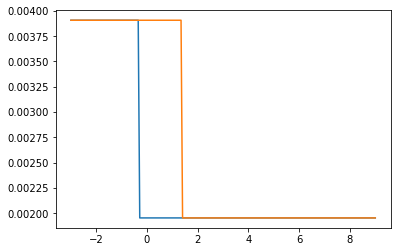

In [10]:
plt.plot(np.log10(hyperparameters), testerrs_n, np.log10(hyperparameters), testerrs)

In [12]:
hyperparameters

array([1.00000000e-03, 1.14895100e-03, 1.32008840e-03, 1.51671689e-03,
       1.74263339e-03, 2.00220037e-03, 2.30043012e-03, 2.64308149e-03,
       3.03677112e-03, 3.48910121e-03, 4.00880633e-03, 4.60592204e-03,
       5.29197874e-03, 6.08022426e-03, 6.98587975e-03, 8.02643352e-03,
       9.22197882e-03, 1.05956018e-02, 1.21738273e-02, 1.39871310e-02,
       1.60705282e-02, 1.84642494e-02, 2.12145178e-02, 2.43744415e-02,
       2.80050389e-02, 3.21764175e-02, 3.69691271e-02, 4.24757155e-02,
       4.88025158e-02, 5.60716994e-02, 6.44236351e-02, 7.40196000e-02,
       8.50448934e-02, 9.77124154e-02, 1.12266777e-01, 1.28989026e-01,
       1.48202071e-01, 1.70276917e-01, 1.95639834e-01, 2.24780583e-01,
       2.58261876e-01, 2.96730241e-01, 3.40928507e-01, 3.91710149e-01,
       4.50055768e-01, 5.17092024e-01, 5.94113398e-01, 6.82607183e-01,
       7.84282206e-01, 9.01101825e-01, 1.03532184e+00, 1.18953407e+00,
       1.36671636e+00, 1.57029012e+00, 1.80418641e+00, 2.07292178e+00,
      